In [9]:
%run "C:\Users\Lenovo\OneDrive\Documenti\Python\W11D1\connessione_a_database.ipynb"

username e uguale a: studente_dapt
sono collegato al database!


In [11]:
query = """SELECT *
        FROM vw_factresellersales_denorm"""
df = pd.read_sql(query, db_engine)
df.head()

,SalesOrderNumber,SalesOrderLineNumber,OrderDate,EnglishProductName,EnglishProductSubcategoryName,EnglishProductCategoryName,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount
0,SO43659,1,2017-07-01,"Mountain-100 Black, 42",Mountain Bikes,Bikes,1,2024.99,NaN,2024.99
1,SO43659,2,2017-07-01,"Mountain-100 Black, 44",Mountain Bikes,Bikes,3,2024.99,NaN,6074.97
2,SO43659,3,2017-07-01,"Mountain-100 Black, 48",Mountain Bikes,Bikes,1,2024.99,NaN,2024.99
3,SO43659,4,2017-07-01,"Mountain-100 Silver, 38",Mountain Bikes,Bikes,1,2039.99,NaN,2039.99
4,SO43659,5,2017-07-01,"Mountain-100 Silver, 42",Mountain Bikes,Bikes,1,2039.99,NaN,2039.99


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57851 entries, 0 to 57850
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SalesOrderNumber               57851 non-null  object 
 1   SalesOrderLineNumber           57851 non-null  int64  
 2   OrderDate                      57851 non-null  object 
 3   EnglishProductName             57851 non-null  object 
 4   EnglishProductSubcategoryName  57851 non-null  object 
 5   EnglishProductCategoryName     57851 non-null  object 
 6   OrderQuantity                  57851 non-null  int64  
 7   UnitPrice                      57851 non-null  float64
 8   TotalProductCost               57775 non-null  float64
 9   SalesAmount                    57851 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 4.4+ MB


In [13]:
df.describe()

,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount
count,57851.000000,57851.000000,57851.000000,57775.000000,57851.000000
mean,16.397469,3.528271,446.388513,1322.850666,1340.487981
std,13.101347,3.035766,521.880164,2170.219318,2151.753062
min,1.000000,1.000000,1.330000,0.860000,1.370000
25%,6.000000,2.000000,34.930000,97.150000,129.560000
50%,13.000000,3.000000,214.240000,461.440000,469.790000
75%,24.000000,4.000000,672.290000,1510.300000,1516.160000
max,72.000000,44.000000,2146.960000,38530.390000,30993.040000


In [17]:
#Iteriamo ogni colonna del DataFrame
for column in df.columns:
    #Verifichiamo se e di tipo categorico
    if df[column].dtype=='object':
        print(f'{column} column contains categorical data.')
        #Conteggio dei valori unici presenti nella colonna
        unique_count = df[column].nunique()
        print(f'{column} contains {unique_count} unique values')
        #Frequenza di ogni valore unico
        all_count = df[column].value_counts()
        print(f'Distribution of every unique value is as such:')
        print(all_count)
        print()
        

SalesOrderNumber column contains categorical data.
SalesOrderNumber contains 3616 unique values
Distribution of every unique value is as such:
SalesOrderNumber
SO51721    72
SO51739    72
SO53465    71
SO51160    71
SO47355    68
           ..
SO63274     1
SO63275     1
SO63276     1
SO57078     1
SO59000     1
Name: count, Length: 3616, dtype: int64

OrderDate column contains categorical data.
OrderDate contains 990 unique values
Distribution of every unique value is as such:
OrderDate
2019-09-02    301
2019-12-03    290
2019-07-15    285
2019-10-06    262
2019-12-01    262
             ... 
2020-01-29      1
2018-05-01      1
2019-01-25      1
2018-01-02      1
2017-10-24      1
Name: count, Length: 990, dtype: int64

EnglishProductName column contains categorical data.
EnglishProductName contains 250 unique values
Distribution of every unique value is as such:
EnglishProductName
AWC Logo Cap                        1149
Long-Sleeve Logo Jersey, L          1142
Sport-100 Helmet, Blue

In [19]:
#Iteriamo ogni colonna del DataFrame
for column in df.columns:
    #Somiamo i valori nulli (i dati booleani vengono interpretati come 1 e 0)
    nan_count = df[column].isna().sum()
    #calcoliamo la percentuale
    nan_percentage = round((nan_count/df.shape[0])*100, 2)
    print(f'{column} contains {nan_count} NaN values, {nan_percentage}% of all rows.')

SalesOrderNumber contains 0 NaN values, 0.0% of all rows.
SalesOrderLineNumber contains 0 NaN values, 0.0% of all rows.
OrderDate contains 0 NaN values, 0.0% of all rows.
EnglishProductName contains 0 NaN values, 0.0% of all rows.
EnglishProductSubcategoryName contains 0 NaN values, 0.0% of all rows.
EnglishProductCategoryName contains 0 NaN values, 0.0% of all rows.
OrderQuantity contains 0 NaN values, 0.0% of all rows.
UnitPrice contains 0 NaN values, 0.0% of all rows.
TotalProductCost contains 76 NaN values, 0.13% of all rows.
SalesAmount contains 0 NaN values, 0.0% of all rows.


In [21]:
df.loc[:, "TotalProductCost"].value_counts(dropna=False)

TotalProductCost
413.15     785
973.41     675
826.29     655
486.71     650
1460.12    610
          ... 
5414.14      1
681.25       1
242.74       1
5948.23      1
132.45       1
Name: count, Length: 1411, dtype: int64

In [23]:
df.isna().sum()

SalesOrderNumber                  0
SalesOrderLineNumber              0
OrderDate                         0
EnglishProductName                0
EnglishProductSubcategoryName     0
EnglishProductCategoryName        0
OrderQuantity                     0
UnitPrice                         0
TotalProductCost                 76
SalesAmount                       0
dtype: int64

In [25]:
import os
pop = pd.read_csv(r"C:\Users\Lenovo\.cache\kagglehub\datasets\ahmettezcantekin\beginner-datasets\versions\1\beginner_datasets\population.csv") 
pop = pop.set_index("Country Name") 
pop = pop.transpose() 
pop = pop.loc[:, ["Italy", "Spain", "Portugal", "Germany", "France", "Switzerland"]] 
pop.head()

Country Name,Italy,Spain,Portugal,Germany,France,Switzerland
1961,0.668383,0.929016,0.805085,0.769854,1.337853,1.978615
1962,0.676623,0.920032,0.721622,0.879432,1.412470,2.535013
1963,0.729553,0.877043,0.403566,0.925875,1.411512,2.137663
1964,0.822624,0.993696,0.055464,0.805141,1.314427,1.654258
1965,0.842109,1.085845,-0.407787,0.853190,1.154839,1.154843


In [27]:
print( pop.Switzerland )

1961    1.978615
1962    2.535013
1963    2.137663
1964    1.654258
1965    1.154843
1966    1.045152
1967    1.239047
1968    1.259256
1969    1.125420
1970    0.722404
1971    0.524792
1972    0.762480
1973    0.738226
1974    0.538521
1975   -0.043738
1976   -0.571596
1977   -0.339011
1978    0.008979
1979    0.200809
1980    0.397074
1981    0.547065
1982    0.584292
1983    0.428788
1984    0.359112
1985    0.441443
1986    0.520392
1987    0.628116
1988    0.734943
1989    0.808536
1990    1.026873
1991    1.249826
1992    1.102521
1993    0.910716
1994    0.797158
1995    0.668242
1996    0.441636
1997    0.240891
1998    0.297136
1999    0.476920
2000    0.561955
2001    0.632771
2002    0.756469
2003    0.741920
2004    0.687426
2005    0.640602
2006    0.627558
2007    0.893691
2008    1.270618
2009    1.249485
2010    1.041558
2011    1.111879
2012    1.061819
2013    1.149880
2014    1.220104
2015    1.193620
Name: Switzerland, dtype: float64


<Axes: >

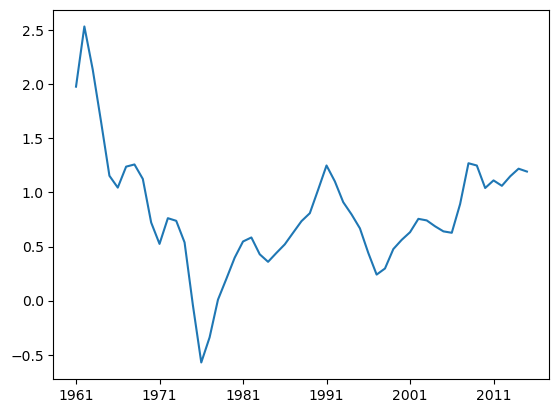

In [29]:
pop.Switzerland.plot()

<Axes: >

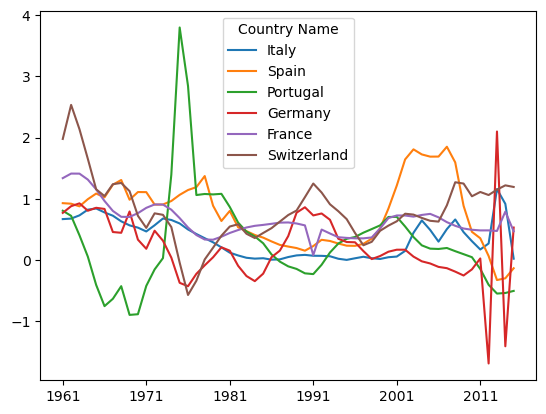

In [30]:
pop.plot()

<Axes: xlabel='Country Name'>

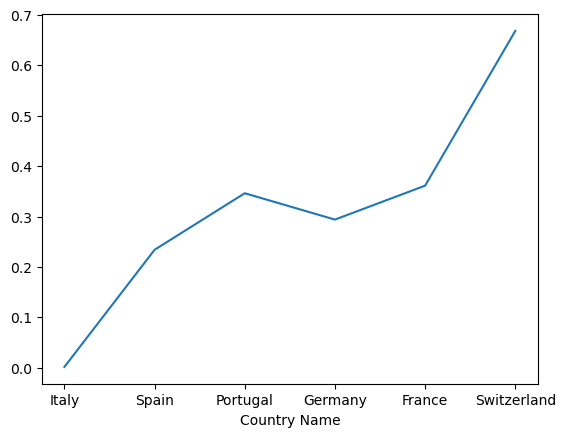

In [32]:
pop.loc["1995"].plot()

<Axes: xlabel='Country Name'>

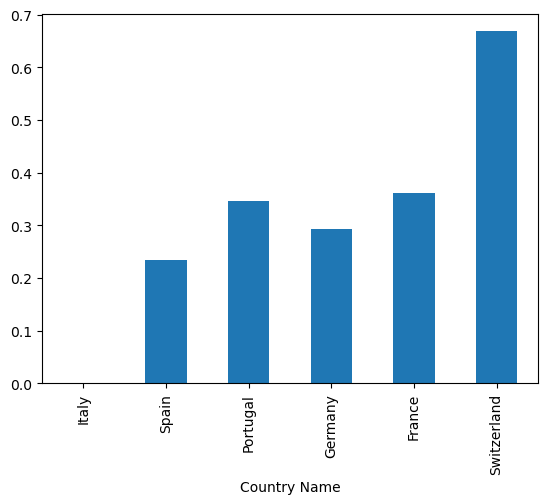

In [33]:
pop.loc["1995"].plot(kind="bar")

<Axes: ylabel='Country Name'>

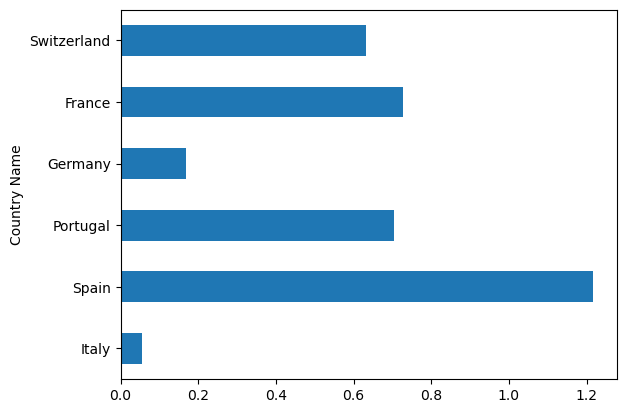

In [37]:
pop.loc["2001"].plot(kind="barh")

In [39]:
df.UnitPrice.value_counts()

UnitPrice
469.79    2969
419.46    2198
28.84     1593
20.19     1493
323.99    1463
          ... 
313.64       1
2.50         1
327.16       1
791.41       1
15.73        1
Name: count, Length: 230, dtype: int64

<Axes: ylabel='Frequency'>

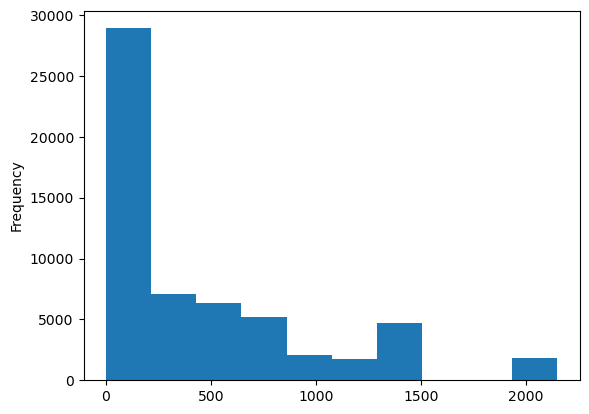

In [41]:
df.UnitPrice.plot(kind="hist")

<Axes: xlabel='Switzerland', ylabel='France'>

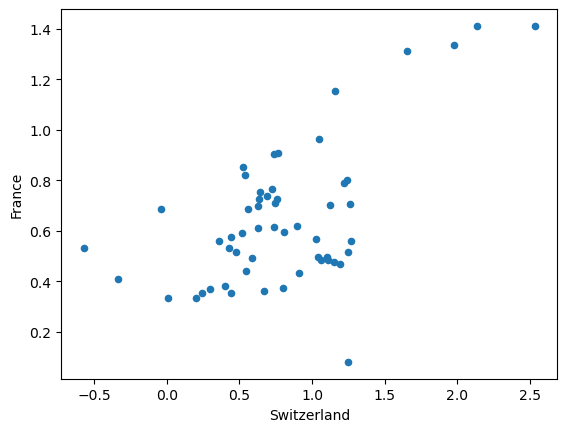

In [43]:
pop.plot(kind="scatter", x="Switzerland", y="France")

<Axes: xlabel='EnglishProductCategoryName', ylabel='count'>

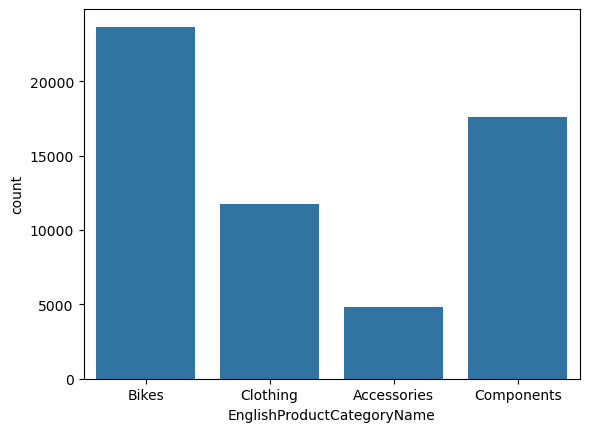

In [55]:
import seaborn as sns 
sns.countplot(data=df, x="EnglishProductCategoryName")

<Axes: xlabel='species', ylabel='sepal_width'>

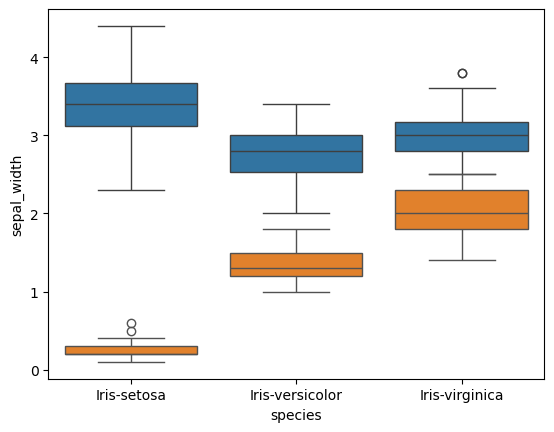

In [52]:
iris = pd.read_csv(r"C:\Users\Lenovo\.cache\kagglehub\datasets\ahmettezcantekin\beginner-datasets\versions\1\beginner_datasets\iris.csv") 
sns.boxplot(data=iris, x="species", y="sepal_width") 
sns.boxplot(data=iris, x="species", y="petal_width")

In [54]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/mpg.csv" 
auto = pd.read_csv(url)

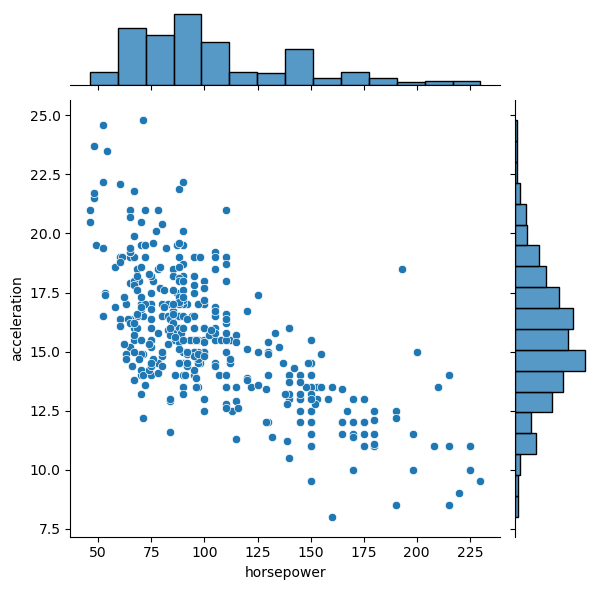

In [56]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/mpg.csv" 
auto = pd.read_csv(url) 
sns.jointplot(data=auto, x="horsepower", y="acceleration")

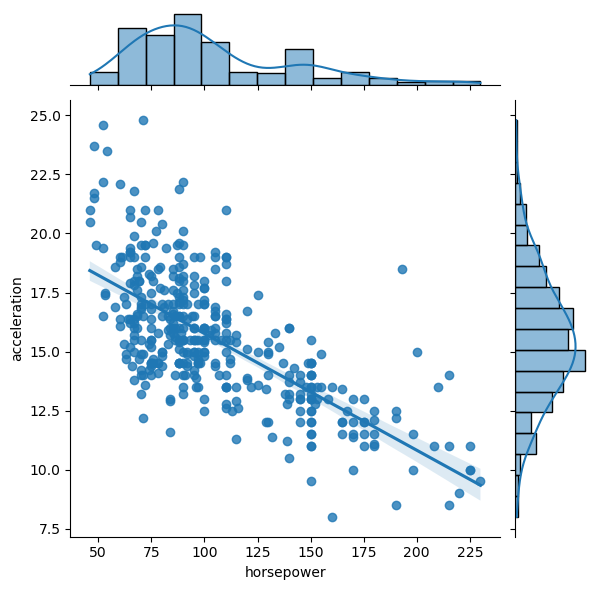

In [58]:
sns.jointplot(data=auto, x="horsepower", y="acceleration", kind="reg")

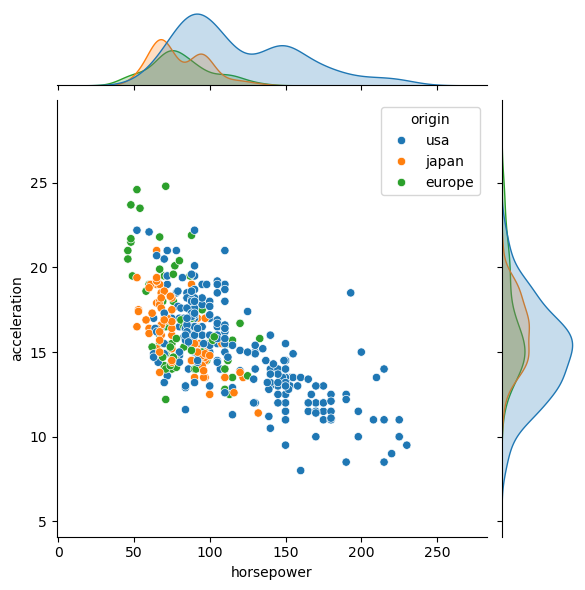

In [60]:
sns.jointplot(data=auto, x="horsepower", y="acceleration", hue="origin")

In [62]:
url = "https://raw.githubusercontent.com/mwaskom/seaborndata/refs/heads/master/flights.csv" 
flights = pd.read_csv(url)

HTTPError: HTTP Error 404: Not Found